pool size as is / pool size as flag

BedroomAbvGr maybe use truncated at 4 or not at all

Try binning BsmtFinType1 or not at all

BsmtFinType2 bin all by Unf or not at all

HalfBath maybe bin only 2 or not at all

MiscFeature - try binning

Dummy encoding:
MSSubClass, MSZoning, Alley, Conditions1/2, BldgType, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, Heating(binned?), CentralAir, Electrical, Functional(binned), GarageType, GarageFinish, PoolQC(binned), Fence(binned), SaleType(binned), SaleCondition(binned)

Ordinal:
LotShape, LandContour, OverallQual(probably transformed), OverallCond(binned?), BsmtCond, BsmtExposure, HeatingQC, BsmtFullBath, FullBath, KitchenAbvGr, KitchenQual, TotRmsAbvGrd(maybe tranformed), Fireplaces, FireplaceQu, GarageCars(truncated, transformed), GarageQual, GarageCond, PavedDrive

LowQualFinSF? EnclosedPorch? 3SsnPorch? MiscVal - only as flags (>0), or not at all

Probably linear:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, ScreenPorch,  


Neighborhood - categorial

Transform:
YearBuilt, YearRemodAdd, BsmtFinSF2, BsmtUnfSF, GarageYrBlt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Convert to all numerical

In [5]:
df = data.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df['MSSubClass'].isnull().sum()

0

In [9]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [14]:
MSSubClass = pd.get_dummies(df['MSSubClass']).drop(40,axis=1)

In [20]:
df['MSZoning'].isnull().sum()

0

In [15]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [16]:
MSZoning = pd.get_dummies(df['MSZoning']).drop('C (all)',axis=1)

In [22]:
df['Alley'].isnull().sum()

1369

In [18]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [23]:
Alley = pd.get_dummies(df['Alley'])

In [40]:
def make_dummy(df, column):
    """
    Take a column name and make a dummy DataFrame from it
        If there are Null values, do not omit one (null will be the 0's)
        otherwise, remove the one will the least counts,
        return the dataFrame
    """
    nulls = df[column].isnull().sum()
    rarest = df[column].value_counts().index[-1]
    dummies = pd.get_dummies(df[column])
    if (nulls>0):
        return dummies
    else:
        return dummies.drop(rarest,axis=1)

### Only linear features for now:

In [83]:
X_df = data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF',
             '1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
             'OpenPorchSF','ScreenPorch']]
X_df = X_df.fillna(0)
y_df = data['SalePrice']

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
tree = RandomForestRegressor(100)
reg = LinearRegression()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [87]:
tree.fit(X_train,y_train)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
tree.score(X_test,y_test),reg.score(X_test,y_test)

(0.8377110049164064, 0.7597915135161433)

In [89]:
tree.feature_importances_

array([0.01864863, 0.02612781, 0.02292419, 0.069138  , 0.15173962,
       0.03817401, 0.05379409, 0.3781492 , 0.18579879, 0.0137881 ,
       0.03369917, 0.0080184 ])

In [90]:
reg.coef_

array([ 2.38969496,  0.15371644, 44.11256088, 10.26847453, 38.41381599,
       59.48734058, 69.93481433, -8.56745229, 91.8201022 , 54.11460183,
       42.09850775, 52.94771328])

In [94]:
features = pd.DataFrame([tree.feature_importances_,reg.coef_],columns=X_df.columns).transpose()
features.columns = ['Tree','Regression']

In [99]:
features.sort_values('Tree',ascending=False)

,Tree,Regression
GrLivArea,0.378149,-8.567452
GarageArea,0.185799,91.820102
TotalBsmtSF,0.151740,38.413816
BsmtFinSF1,0.069138,10.268475
2ndFlrSF,0.053794,69.934814
1stFlrSF,0.038174,59.487341
OpenPorchSF,0.033699,42.098508
LotArea,0.026128,0.153716
MasVnrArea,0.022924,44.112561
LotFrontage,0.018649,2.389695


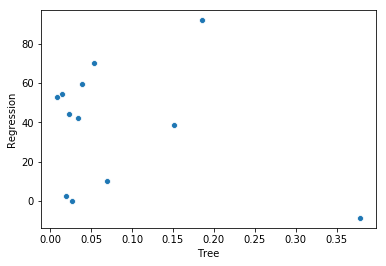

In [100]:
sns.scatterplot(features['Tree'],features['Regression'])